Binary Classification using MLP


In [100]:
import numpy as np
import pandas as pd


In [101]:
df = pd.read_csv("/content/drive/MyDrive/DL Datasets/Churn_Modelling.csv")

In [102]:
df.shape

(10000, 14)

In [103]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [105]:
df.duplicated().sum()

0

In [106]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [107]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [108]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [109]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [110]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


one hot encode categorical variables

In [111]:
df =pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

Scale values


unscaled values pe agar train kar diya gaya model toh , weights converge nahi honge

In [112]:
X= df.drop(columns=['Exited'])
y=df['Exited']

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [114]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [116]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [117]:
X_test_scaled

array([[-1.05008411,  0.75175306, -1.01618321, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [ 0.29631699, -0.47907689, -0.67334137, ..., -0.56118125,
        -0.57812007,  0.90179633],
       [-1.24686581,  0.27835693, -1.01618321, ..., -0.56118125,
        -0.57812007, -1.10889783],
       ...,
       [-0.87401628, -0.47907689,  1.72655149, ..., -0.56118125,
         1.72974448,  0.90179633],
       [-0.31474197, -0.85779379, -1.01618321, ...,  1.78195548,
        -0.57812007, -1.10889783],
       [ 0.0373937 ,  1.22514919,  1.38370966, ...,  1.78195548,
        -0.57812007,  0.90179633]])

In [118]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

keras me 2 tarah ke model bana sakte hai ek hogta hai sequential , ek hota hai non sequential

hummare pass idhar ek input layer hoga , ek hidden layer hoga , ek output layer hoga ,

hidden layer me 3 nodes rakhenge

In [119]:
model = Sequential()


In [120]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [121]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 11)                132       
                                                                 
 dense_6 (Dense)             (None, 11)                132       
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


nOW WE COMPILE MODEL

In this step we tell something , like konsa loss function use kaarna hai , konsa optimizer use karna hai gradient descent ke liye

In [122]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [123]:
history= model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.5158 - accuracy: 0.7902 - val_loss: 0.4850 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7997 - val_loss: 0.4508 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4387 - accuracy: 0.8086 - val_loss: 0.4318 - val_accuracy: 0.8094
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8152 - val_loss: 0.4204 - val_accuracy: 0.8144
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4185 - accuracy: 0.8247 - val_loss: 0.4121 - val_accuracy: 0.8231
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8308 - val_loss: 0.4047 - val_accuracy: 0.8250
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4045 - accuracy: 0.8339 - val_loss: 0.3976 - val_accuracy: 0.8225

Now se where our weights and biases are stored

In [124]:
model.layers[0].get_weights()

[array([[ 0.7609978 ,  0.32431585, -0.36572626, -0.43733078, -0.40168613,
          0.25125578, -0.05347341, -0.19815688, -0.09666462, -0.12887847,
         -0.03053523],
        [ 0.12428384, -0.34097797, -0.04083951, -0.41466522,  0.8725391 ,
         -0.6261352 ,  0.1785225 , -0.89525324, -0.66903466,  0.32991225,
         -0.19693696],
        [ 0.2514361 , -0.03704968,  0.41776803, -0.6539545 , -0.18956336,
         -0.19953321, -0.11207993,  0.07489515, -0.24792364,  0.09510376,
         -0.11956005],
        [ 0.20647986, -0.4202419 , -0.64380527, -0.30222458,  0.41813815,
          0.17321473,  0.73871166,  0.16431202,  0.1708236 ,  0.19088584,
         -0.0277437 ],
        [-0.06583579, -0.12251085,  0.08255026,  0.62308645, -0.0998166 ,
         -0.12958628,  1.2165602 ,  0.27199104, -0.14695401, -0.13492951,
         -1.5340419 ],
        [-0.7366649 ,  0.22864763, -0.25180534,  0.04272604, -0.17088453,
         -0.17251736, -0.141119  , -0.1929757 ,  0.05445754,  0.0678141

In [125]:
model.layers[1].get_weights()

[array([[ 0.02485573, -0.26125085,  0.52492034, -0.14526312, -0.16384286,
          0.6010393 ,  0.13225457, -0.36992145,  0.50804424,  0.16083148,
          0.23688567],
        [-0.6715735 , -0.21434706, -0.35853943,  0.26294193,  0.64963084,
          0.12448304,  0.5418906 ,  0.24766698,  0.37755322,  0.494151  ,
          0.34584782],
        [ 0.13279204, -0.13848019,  0.30838275, -0.45275772,  0.38457286,
          0.33114398, -0.23964366,  0.39465475,  0.0931338 ,  0.1856152 ,
          0.30956352],
        [ 0.33325592,  0.26595345,  0.27699047, -1.0915098 , -0.04249866,
         -0.2886006 , -0.00201654,  0.08578846,  0.37908968,  0.310216  ,
          0.32716614],
        [ 0.38181102,  0.39767537, -0.5931161 ,  0.49925533,  0.29603153,
         -0.28811422,  0.14018048,  0.27467757,  0.09190428,  0.62626517,
         -0.49251717],
        [-0.28959295, -0.7514986 , -0.29793635, -0.64514786, -0.23469147,
          0.38936475,  0.4032032 , -0.3234175 , -0.47202095,  0.4560247

In [126]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.03763555],
       [0.09794954],
       [0.03890539],
       ...,
       [0.00516316],
       [0.03225112],
       [0.40046364]], dtype=float32)

hum yaha dekh rahe hai ki , hummara output 0aur 1 nahi hai yeh in between 0 and 1 ke koi number de raha hai , kyuki idhar humne sigmoid function use kiya hai , isliye hum zero aur 1 me complte karna padega

for this we have to decide threshold , for this we have toh find ROC , AOC curve , which we learn later

In [127]:
y_log = model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [128]:
y_pred = np.where(y_log>0.5,1,0)


In [129]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [130]:
import matplotlib.pyplot as plt

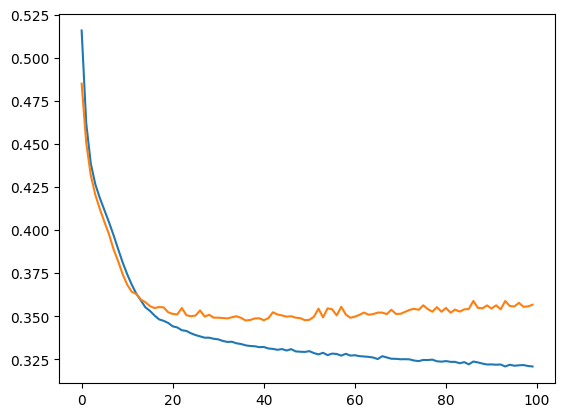

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


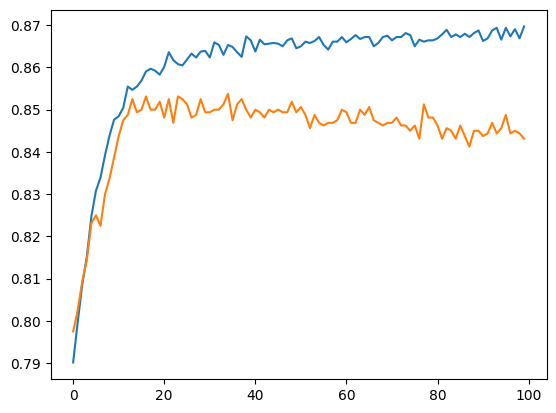

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])